In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
## Read data
import os
print(os.getcwd())

/Users/kunalchakraborty/Downloads/industry_project_HQ


In [20]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 4.7 MB/s eta 0:00:01


In [3]:
data = pd.read_excel("data/PredictorData2020.xlsx", sheet_name="Monthly")

/Users/kunalchakraborty/Downloads/MFE22_GRP13_SEM1/venv/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
## Global parameters
start_date = datetime(1959,1,1).date()
end_date = datetime(2020,12,1).date()

In [5]:
## Parse dates and keep data only from 1959
data["yyyymm"] = data["yyyymm"].apply(str)
data["yyyymm"] = data["yyyymm"].apply(lambda x:datetime.strptime(x,"%Y%m").date())
data = data[(data["yyyymm"] >=datetime(1959,1,1).date()) & (data["yyyymm"]<=end_date)]
data.reset_index(drop=True, inplace=True)
data.rename(columns={"yyyymm":"date"},inplace=True)
data.set_index("date",inplace=True)

In [6]:
## Save data
data.to_csv("data/index_data.csv")

In [7]:
data.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
date,,,,,,,,,,,,,,,,,
1959-01-01,55.42,1.75667,2.96333,0.502896,0.0282,0.0412,0.0487,0.0408,0.027736,0.0021,0.003460,-0.0080,-0.0028,0.000585,0.001722,0.006331,0.005395
1959-02-01,55.41,1.76333,3.03667,0.494946,0.0270,0.0414,0.0489,0.0402,0.027899,0.0019,-0.003448,0.0117,0.0126,0.000845,0.001945,0.006711,0.002210
1959-03-01,55.44,1.77000,3.11000,0.516860,0.0280,0.0413,0.0485,0.0403,0.024984,0.0022,0.000000,0.0017,-0.0083,0.000492,0.001768,0.003352,0.000826
1959-04-01,57.59,1.77667,3.20667,0.498597,0.0295,0.0423,0.0486,0.0414,0.024361,0.0020,0.003460,-0.0117,-0.0172,0.000493,0.001357,0.040054,0.039093
1959-05-01,58.68,1.78333,3.30333,0.483077,0.0284,0.0437,0.0496,0.0417,0.025887,0.0022,0.000000,-0.0005,-0.0114,0.000428,0.001913,0.023631,0.019043


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 1959-01-01 to 2020-12-01
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       744 non-null    float64
 1   D12         744 non-null    float64
 2   E12         744 non-null    float64
 3   b/m         734 non-null    float64
 4   tbl         744 non-null    float64
 5   AAA         744 non-null    float64
 6   BAA         744 non-null    float64
 7   lty         744 non-null    float64
 8   ntis        744 non-null    float64
 9   Rfree       744 non-null    float64
 10  infl        744 non-null    float64
 11  ltr         744 non-null    float64
 12  corpr       744 non-null    float64
 13  svar        744 non-null    float64
 14  csp         528 non-null    float64
 15  CRSP_SPvw   744 non-null    float64
 16  CRSP_SPvwx  744 non-null    float64
dtypes: float64(17)
memory usage: 104.6+ KB


In [9]:
## Plotting functions for time series
def plot_series(tseries, xlabel, ylabel, title, new_fig=True, label=""):
    if new_fig:
        plt.figure(figsize=(8,6))
    plt.plot(tseries,label=label)
    plt.xlabel(xlabel, size=15)
    plt.ylabel(ylabel, size=15)
    plt.title(title, size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)

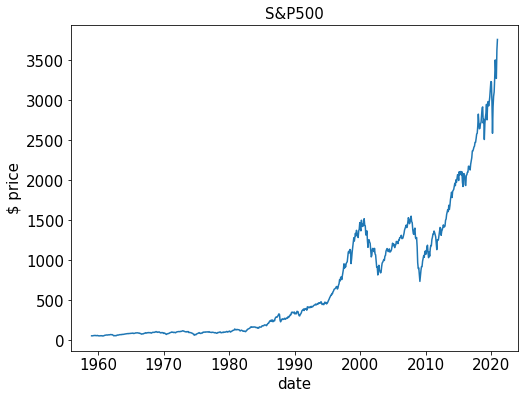

In [10]:
plot_series(data["Index"],xlabel="date",ylabel="$ price",title="S&P500",label = "S&P")

In [11]:
## Prepare monthly returns on S&P index
data.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
date,,,,,,,,,,,,,,,,,
1959-01-01,55.42,1.75667,2.96333,0.502896,0.0282,0.0412,0.0487,0.0408,0.027736,0.0021,0.003460,-0.0080,-0.0028,0.000585,0.001722,0.006331,0.005395
1959-02-01,55.41,1.76333,3.03667,0.494946,0.0270,0.0414,0.0489,0.0402,0.027899,0.0019,-0.003448,0.0117,0.0126,0.000845,0.001945,0.006711,0.002210
1959-03-01,55.44,1.77000,3.11000,0.516860,0.0280,0.0413,0.0485,0.0403,0.024984,0.0022,0.000000,0.0017,-0.0083,0.000492,0.001768,0.003352,0.000826
1959-04-01,57.59,1.77667,3.20667,0.498597,0.0295,0.0423,0.0486,0.0414,0.024361,0.0020,0.003460,-0.0117,-0.0172,0.000493,0.001357,0.040054,0.039093
1959-05-01,58.68,1.78333,3.30333,0.483077,0.0284,0.0437,0.0496,0.0417,0.025887,0.0022,0.000000,-0.0005,-0.0114,0.000428,0.001913,0.023631,0.019043


$$R_t = \frac{P_{t+1} + D_{t+1}}{P_{t}} - 1$$

In [12]:
## Compute net returns on S&P
data["temp"] = data["Index"] + data["D12"]/12
data["returns"] = data["temp"]/data["Index"].shift()
data["returns"] = data["returns"] - 1
data.drop("temp",axis=1,inplace=True)

In [13]:
data[["Index","returns"]]

,Index,returns
date,,
1959-01-01,55.42,NaN
1959-02-01,55.41,0.002471
1959-03-01,55.44,0.003203
1959-04-01,57.59,0.041451
1959-05-01,58.68,0.021507
...,...,...
2020-08-01,3500.31,0.071571
2020-09-01,3363.00,-0.037827
2020-10-01,3269.96,-0.026212


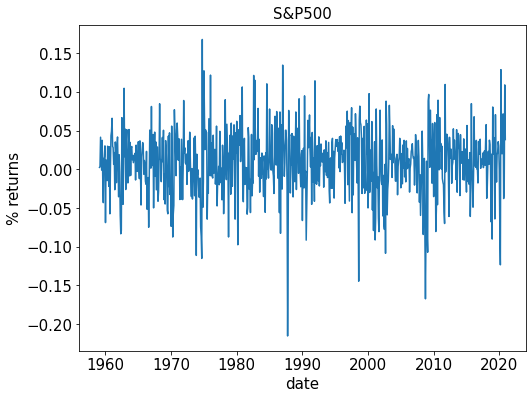

In [14]:
## Plot S&P returns
plot_series(data["returns"],xlabel="date",ylabel="% returns",title="S&P500",label = "S&P")

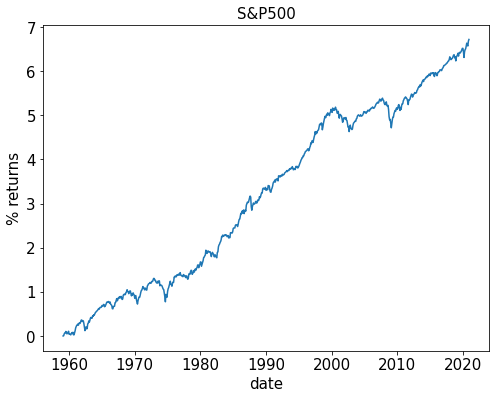

In [16]:
## Plot S&P returns
plot_series(data["returns"].cumsum(),xlabel="date",ylabel="% returns",title="S&P500",label = "S&P")

In [15]:
data["returns"].describe()

count    743.000000
mean       0.009041
std        0.042574
min       -0.215375
25%       -0.015412
50%        0.012069
75%        0.036714
max        0.167760
Name: returns, dtype: float64

In [9]:
## Load FRED data
fred_data = pd.read_csv("data/current.csv")

In [4]:
## Save transformation information
transformation_info = fred_data[fred_data.columns[1:]].iloc[0].to_dict()

In [10]:
## Pre-processing
fred_data = fred_data.iloc[1:-1].copy()
fred_data["sasdate"] = fred_data["sasdate"].apply(lambda x:datetime.strptime(x,"%m/%d/%Y").date())
fred_data = fred_data[(fred_data["sasdate"] >= start_date) & 
                      (fred_data["sasdate"] <= end_date)]
fred_data.reset_index(drop=True, inplace=True)
fred_data.rename(columns={"sasdate":"date"},inplace=True)
fred_data.set_index("date",inplace=True)

In [13]:
## Save as fred_data
#fred_data.to_csv("data/fred_data.csv")

In [11]:
fred_data.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6250,23.4581,22.1904,32.4078,21.9882,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2043,NaN
1959-02-01,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0681,23.7747,22.3827,32.6455,22.1036,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5280,NaN
1959-03-01,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4004,23.9186,22.4925,32.6455,22.5365,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6405,NaN
1959-04-01,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8989,24.2641,22.8221,33.1606,22.6807,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8099,NaN
1959-05-01,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2589,24.4655,23.0418,33.3190,23.1424,...,11.454,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7315,NaN


In [99]:
fred_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 1959-01-01 to 2020-12-01
Columns: 128 entries, RPI to VXOCLSx
dtypes: float64(128)
memory usage: 749.8+ KB


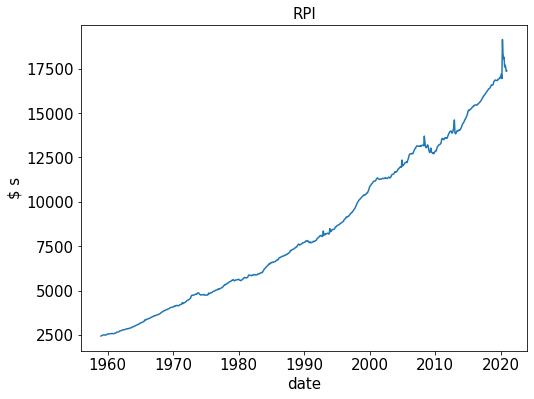

In [101]:
## Check transformation logic
plot_series(fred_data["RPI"],xlabel="date",ylabel="$ s",title="RPI",label = "RPI")

In [107]:
## Write functions for each transformation
def transform(tseries, tf_type, drop_null = False):
    final_tseries = None
    if tf_type == 1:
        final_tseries = tseries
    elif tf_type == 2:
        final_tseries = tseries.diff()
    elif tf_type == 3:
        final_tseries = tseries.diff().diff()
    elif tf_type == 4:
        final_tseries = np.log(tseries)
    elif tf_type == 5:
        final_tseries = np.log(tseries).diff()
    elif tf_type == 6:
        final_tseries = np.log(tseries).diff().diff()
    elif tf_type == 7:
        final_tseries = (tseries/tseries.shift() - 1).diff()
    
    if drop_null:
        final_tseries = final_tseries.dropna()
    return final_tseries

In [109]:
for key, value in transformation_info.items():
    fred_data["transformed_{}".format(key)] = transform(fred_data[key], value)

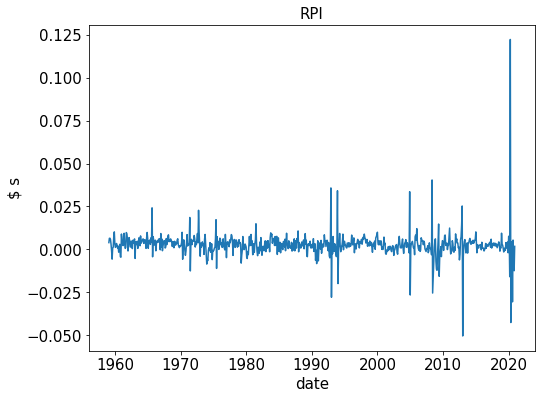

In [112]:
plot_series(fred_data["transformed_RPI"],xlabel="date",ylabel="$ s",title="RPI",label = "RPI")

## Join with data to form one mega dataset

In [118]:
final_data = data.join(fred_data, how='outer', lsuffix='_left', rsuffix='_right')

In [119]:
final_data.reset_index().to_csv("data/main_df.csv",index=False)